In [1]:
import pandas as pd

In [2]:
ls

EDA.ipynb                    flight_density_heatmap.html
README.md                    states_2022-06-27-00.csv


In [3]:
df = pd.read_csv("states_2022-06-27-00.csv")

In [4]:
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1656288000,34718e,40.872940,1.922974,187.631064,245.543044,8.12800,IBE2601,False,False,False,417.0,5509.26,5814.06,1.656288e+09,1.656288e+09
1,1656288000,ac6364,33.139048,-85.526266,237.239575,337.160319,0.00000,DAL749,False,False,False,5761.0,10363.20,11003.28,1.656288e+09,1.656288e+09
2,1656288000,406471,51.908569,1.838303,169.170746,286.065061,-0.65024,TOM891,False,False,False,3541.0,5478.78,5570.22,1.656288e+09,1.656288e+09
3,1656288000,a04417,33.757187,-83.458370,132.312157,228.625465,-0.32512,N116SK,False,False,False,1716.0,7955.28,8458.20,1.656288e+09,1.656288e+09
4,1656288000,c04aa1,42.869522,-79.307939,209.512017,355.493393,-7.80288,CGCGU,False,False,False,3622.0,5859.78,6088.38,1.656288e+09,1.656288e+09


In [5]:
df.shape

(2277578, 16)

In [6]:
df.columns

Index(['time', 'icao24', 'lat', 'lon', 'velocity', 'heading', 'vertrate',
       'callsign', 'onground', 'alert', 'spi', 'squawk', 'baroaltitude',
       'geoaltitude', 'lastposupdate', 'lastcontact'],
      dtype='object')

In [7]:
# Looks like our data are x,y coordinate pairs of certain flights (callsign is individual flight)

In [9]:
# We can see the velocity of the aircraft, the compass heading, the vertical climb rate, the callsign of the aircraft,
# whether or not it was on the ground (onground), don't know what alert and api are, and altitude data.

In [8]:
print(df.describe())

               time           lat           lon      velocity       heading  \
count  2.277578e+06  2.133292e+06  2.133292e+06  2.070630e+06  2.070630e+06   
mean   1.656290e+09  3.328865e+01 -4.572922e+01  1.789612e+02  1.826717e+02   
std    1.026153e+03  1.966637e+01  8.314491e+01  7.465836e+01  1.022440e+02   
min    1.656288e+09 -4.656253e+01 -1.772453e+02  0.000000e+00  0.000000e+00   
25%    1.656289e+09  3.223737e+01 -9.804735e+01  1.184272e+02  9.146880e+01   
50%    1.656290e+09  3.790106e+01 -8.145337e+01  2.096724e+02  1.866869e+02   
75%    1.656291e+09  4.247394e+01  7.979380e+00  2.365961e+02  2.718994e+02   
max    1.656292e+09  7.038773e+01  1.778167e+02  2.259892e+03  3.598874e+02   

           vertrate        squawk  baroaltitude   geoaltitude  lastposupdate  \
count  2.071013e+06  1.155432e+06  2.068671e+06  2.006415e+06   2.133292e+06   
mean  -2.384185e-01  3.512643e+03  6.990280e+03  7.355067e+03   1.656290e+09   
std    4.962542e+00  2.176651e+03  4.423840e+03 

In [9]:
print(df.isnull().sum())

time                   0
icao24                 0
lat               144286
lon               144286
velocity          206948
heading           206948
vertrate          206565
callsign           56478
onground               0
alert                  0
spi                    0
squawk           1122146
baroaltitude      208907
geoaltitude       271163
lastposupdate     144286
lastcontact            0
dtype: int64


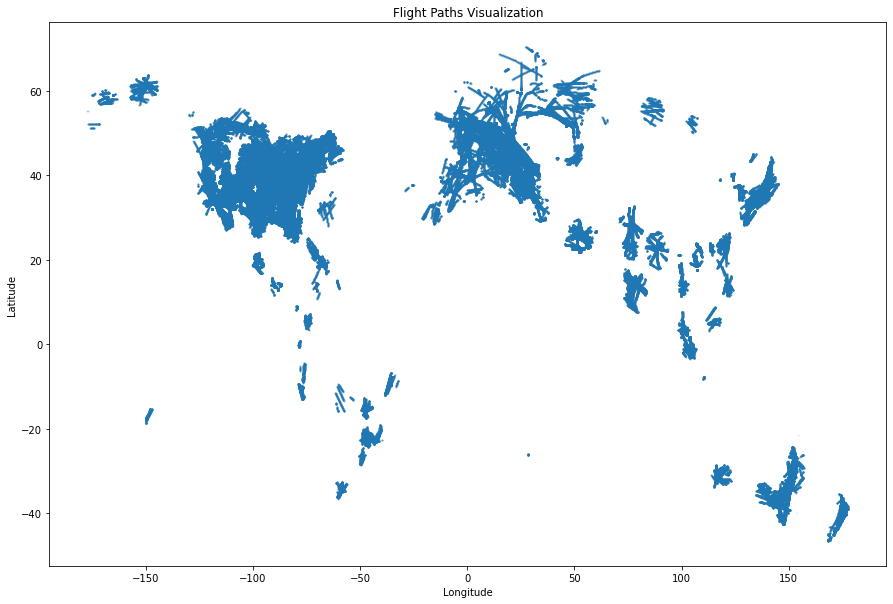

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.scatter(df['lon'], df['lat'], alpha=0.1, s=1)
plt.title('Flight Paths Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

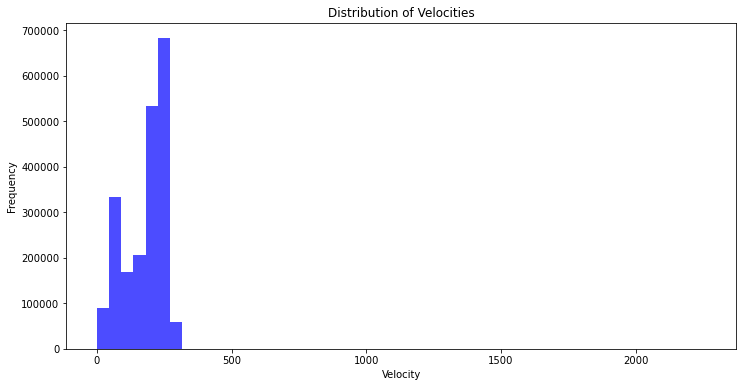

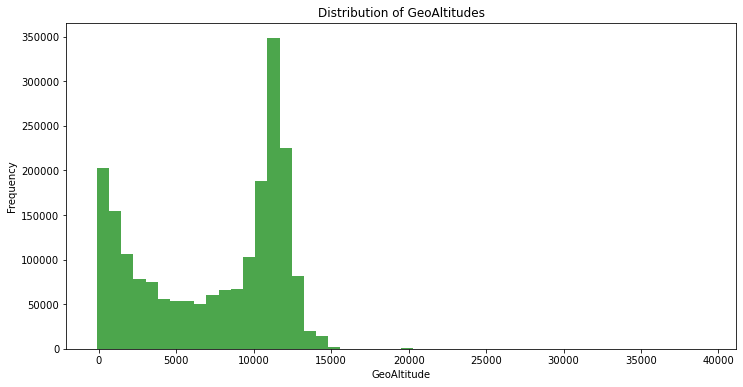

In [11]:
plt.figure(figsize=(12,6))
plt.hist(df['velocity'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Velocities')
plt.xlabel('Velocity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(df['geoaltitude'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of GeoAltitudes')
plt.xlabel('GeoAltitude')
plt.ylabel('Frequency')
plt.show()

In [16]:
import numpy as np
print("Number of NaN values in 'lat':", df['lat'].isna().sum())
print("Number of NaN values in 'lon':", df['lon'].isna().sum())
print("Number of Infinite values in 'lat':", np.isinf(df['lat']).sum())
print("Number of Infinite values in 'lon':", np.isinf(df['lon']).sum())

Number of NaN values in 'lat': 144286
Number of NaN values in 'lon': 144286
Number of Infinite values in 'lat': 0
Number of Infinite values in 'lon': 0


In [17]:
df = df.dropna(subset=['lat', 'lon'])
df = df[~np.isinf(df['lat'])]
df = df[~np.isinf(df['lon'])]

In [19]:
from sklearn.cluster import KMeans

# Assuming 5 common routes
kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df[['lat', 'lon']])

In [22]:
df.head(5)

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,cluster
0,1656288000,34718e,40.872940,1.922974,187.631064,245.543044,8.12800,IBE2601,False,False,False,417.0,5509.26,5814.06,1.656288e+09,1.656288e+09,0
1,1656288000,ac6364,33.139048,-85.526266,237.239575,337.160319,0.00000,DAL749,False,False,False,5761.0,10363.20,11003.28,1.656288e+09,1.656288e+09,1
2,1656288000,406471,51.908569,1.838303,169.170746,286.065061,-0.65024,TOM891,False,False,False,3541.0,5478.78,5570.22,1.656288e+09,1.656288e+09,0
3,1656288000,a04417,33.757187,-83.458370,132.312157,228.625465,-0.32512,N116SK,False,False,False,1716.0,7955.28,8458.20,1.656288e+09,1.656288e+09,1
4,1656288000,c04aa1,42.869522,-79.307939,209.512017,355.493393,-7.80288,CGCGU,False,False,False,3622.0,5859.78,6088.38,1.656288e+09,1.656288e+09,1


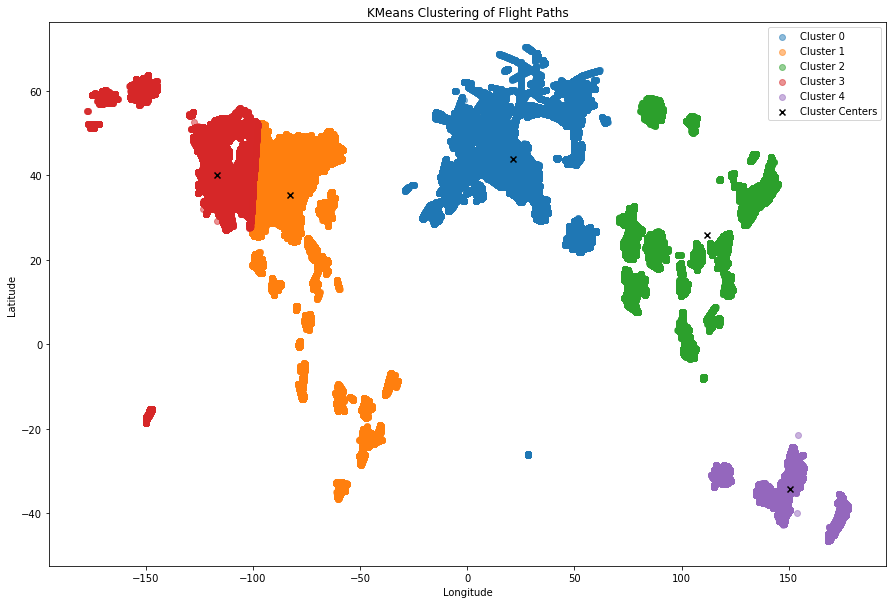

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Create a scatter plot of lat vs lon, colored by cluster assignment
for cluster in range(5):  
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['lon'], subset['lat'], label=f'Cluster {cluster}', alpha=0.5)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='black', marker='x', label='Cluster Centers')

plt.title('KMeans Clustering of Flight Paths')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

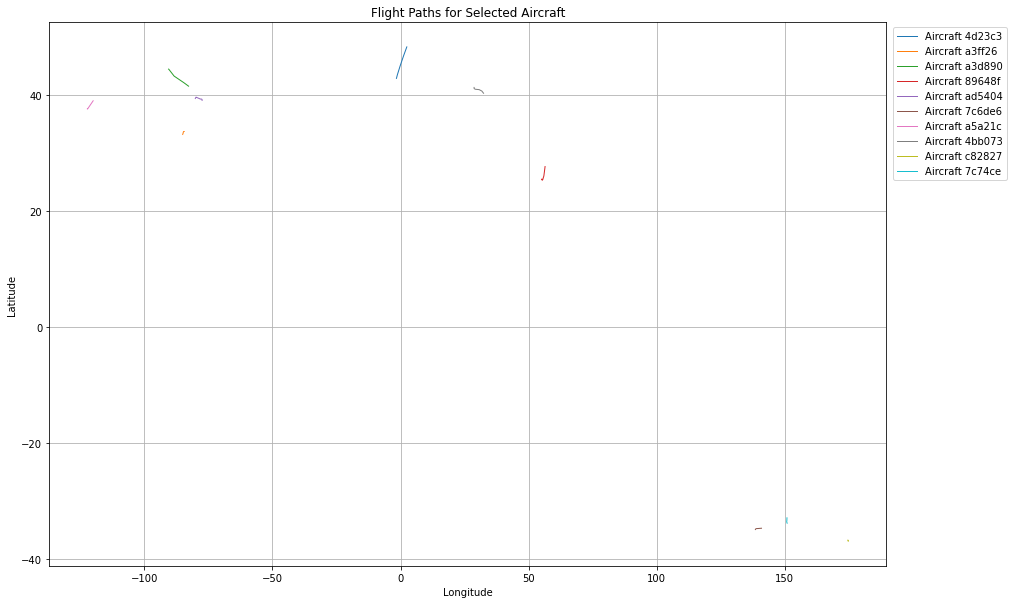

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Selecting a Subset of Aircraft
num_aircraft = 10  # Let's choose 10 aircrafts for visualization purposes
unique_icao24 = df['icao24'].unique()
selected_icao24 = np.random.choice(unique_icao24, size=num_aircraft, replace=False)

plt.figure(figsize=(15,10))

# Step 2: Visualizing Individual Flight Paths
for icao in selected_icao24:
    subset = df[df['icao24'] == icao]
    subset = subset.sort_values(by='time')  # Ensure data is in chronological order
    
    plt.plot(subset['lon'], subset['lat'], label=f'Aircraft {icao}', linewidth=1)

plt.title('Flight Paths for Selected Aircraft')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()


In [26]:
!pip install folium
import folium
from folium.plugins import HeatMap

# Initial setup for the map
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=5)

# Extracting coordinates from the dataframe
heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]

# Adding the HeatMap to our map
HeatMap(heat_data).add_to(m)

m.save('flight_density_heatmap.html')


     |████████████████████████████████| 102 kB 6.3 MB/s ta 0:00:01


In [7]:
# TIME SERIES ANALYSIS

df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert Unix timestamp to datetime format
df = df.set_index('time')  # Set 'time' as the index

In [8]:
df.head()

,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
time,,,,,,,,,,,,,,,
2022-06-27,34718e,40.872940,1.922974,187.631064,245.543044,8.12800,IBE2601,False,False,False,417.0,5509.26,5814.06,1.656288e+09,1.656288e+09
2022-06-27,ac6364,33.139048,-85.526266,237.239575,337.160319,0.00000,DAL749,False,False,False,5761.0,10363.20,11003.28,1.656288e+09,1.656288e+09
2022-06-27,406471,51.908569,1.838303,169.170746,286.065061,-0.65024,TOM891,False,False,False,3541.0,5478.78,5570.22,1.656288e+09,1.656288e+09
2022-06-27,a04417,33.757187,-83.458370,132.312157,228.625465,-0.32512,N116SK,False,False,False,1716.0,7955.28,8458.20,1.656288e+09,1.656288e+09
2022-06-27,c04aa1,42.869522,-79.307939,209.512017,355.493393,-7.80288,CGCGU,False,False,False,3622.0,5859.78,6088.38,1.656288e+09,1.656288e+09


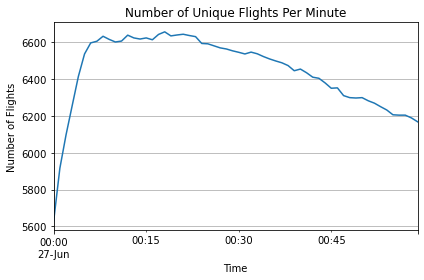

In [20]:
# Resample the data for minute-by-minute counts of flights
flight_counts_per_minute = df.resample('T')['icao24'].nunique()

# Plot
flight_counts_per_minute.plot()
plt.title('Number of Unique Flights Per Minute')
plt.ylabel('Number of Flights')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()

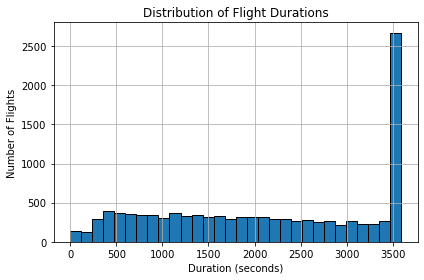

In [21]:
# Calculate the time range for each flight
flight_durations = df.groupby('icao24').apply(lambda x: x.index.max() - x.index.min())

# Plot a histogram of durations
flight_durations.dt.total_seconds().hist(bins=30, edgecolor='black')
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.tight_layout()
plt.show()